# 함수

## 파이썬 함수의 구조
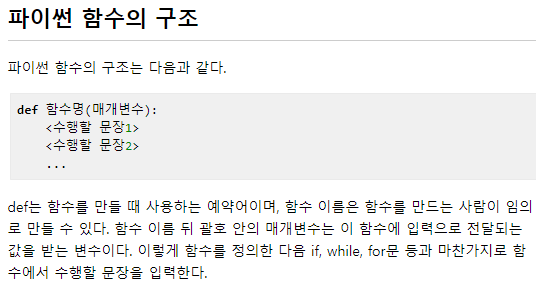

## 매개변수와 인수
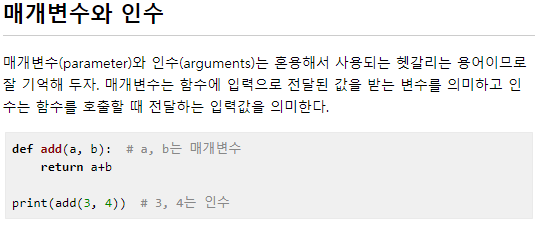

## 입력값이 몇개인지 모를 때
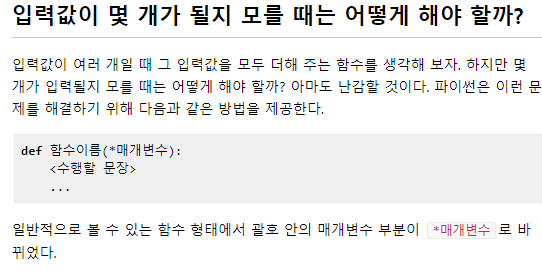

- 여러 개의 입력 값을 받는 함수 만들기

다음 예를 통해 여러 개의 입력값을 모두 더하는 함수를 직접 만들어 보자.   
예를 들어 add_many(1, 2)이면 3을, add_many(1,2,3)이면 6을,   
add_many(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)이면 55를 돌려주는 함수를 만들어 보자.

In [7]:
def add_many(*args):
    result = 0
    for i in args:
        result=result+i
    return result

In [8]:
add_many(1,2)

3

In [9]:
add_many(1,2,3)

6

In [10]:
add_many(1,2,3,4,5,6)

21

- 위에서 만든 add_many 함수는 입력값이 몇 개이든 상관이 없다. *args처럼 매개변수 이름 앞에 *을 붙이면 입력값을 전부 모아서 튜플로 만들어 주기 때문이다. 만약 add_many(1, 2, 3)처럼 이 함수를 쓰면 args는 (1, 2, 3)이 되고, add_many(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)처럼 쓰면 args는 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)이 된다. 

In [22]:
def add_mul(choice, *num):
    if choice == "add":
        result=0
        for i in num:
            result=result+i
    elif choice=="mul":
        result=1
        for i in num:
            result=result*i
    return result

In [23]:
result = add_mul('add', 1,2,3,4,5)
print(result)

15


In [24]:
result=add_mul('mul', 1,2,3,4,5)
print(result)

120


 - 키워드 파라미터 kwargs
 
 이번에는 키워드 파라미터에 대해 알아보자.   
 키워드 파라미터를 사용할 때는 매개변수 앞에 별 두 개(**)를 붙인다.   
 역시 이것도 예제로 알아보자. 먼저 다음과 같은 함수를 작성한다.

In [25]:
def print_kwargs(**kwargs):
    print(kwargs)

In [26]:
print_kwargs(a=1)

{'a': 1}


In [27]:
print_kwargs(name='foo', age=3)

{'name': 'foo', 'age': 3}


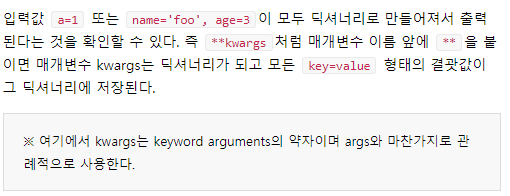

## 함수의 결과 값은 언제나 하나이다

In [28]:
def add_and_mul(a,b):
    return a+b, a*b


In [29]:
result = add_and_mul(3,4)

In [30]:
print(result)

(7, 12)


결괏값 a+b와 a*b는 튜플값 하나인 (a+b, axb)로 돌려준다.  

따라서 result 변수는 다음과 같은 값을 갖게 된다.

result = (7, 12)

- return의 또 다른 쓰임새

특별한 상황일 때 함수를 빠져나가고 싶다면 return을 단독으로 써서 함수를 즉시 빠져나갈 수 있다. 다음 예를 보자.

## 매개변수에 초깃값 미리 설정하기

-  함수의 매개변수에 들어갈 값이 항상 변하는 것이 아닐 경우에는 이렇게 함수의 초깃값을 미리 설정해 두면 유용하다.

In [33]:
def say_myself(name, old, man=True):
    print("나의 이름은 %s 입니다" %name)
    print("나이는 %d 입니다"% old)
    if man:
        print("남자입니다")
    else:
        print("여자입니다")

In [34]:
say_myself("이동민",27,True)

나의 이름은 이동민 입니다
나이는 27 입니다
남자입니다


- 초깃 값을 주지 않으면 man은 default True를 가진다.

In [35]:
say_myself("이동민",27)

나의 이름은 이동민 입니다
나이는 27 입니다
남자입니다


 - 초깃값을 설정해 놓은 매개변수 뒤에 초깃값을 설정해 놓지 않은 매개변수는 사용할 수 없다.   
 즉 매개변수로 (name, old, man=True)는 되지만 (name, man=True, old)는 안 된다는 것이다. 초기화시키고 싶은 매개변수를 항상 뒤쪽에 놓는 것을 잊지 말자.

## 함수 안에서 선언한 변수의 효력범위

- 함수 안에서 선언한 매개변수는 함수 안에서만 사용될 뿐 함수 밖에서는 사용되지 않는다. 


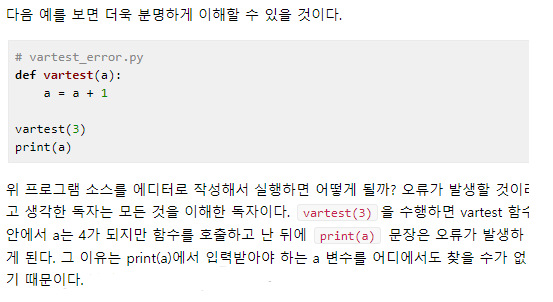

## 함수 안에서 함수 밖의 변수를 변경하는 법

 - return 사용하기

In [43]:
a=1
def vartest(a):
    a=a+1
    return a

In [45]:
a= vartest(a)
print(a)

#  a가 vartest 함수의 결괏값으로 바뀐다. 
#  여기에서도 물론 vartest 함수 안의 a 매개변수는 함수 밖의 a와는 다른 것이다.

3


- global 명령어 사용하기

In [46]:
a=1
def vartest():
    global a
    a=a+1

In [47]:
vartest()

In [48]:
print(a)

2


위 예에서 볼 수 있듯이 vartest 함수 안의 global a 문장은 함수 안에서 함수 밖의 a 변수를 직접 사용하겠다는 뜻이다. 하지만 프로그래밍을 할 때 global 명령어는 사용하지 않는 것이 좋다. 왜냐하면 함수는 독립적으로 존재하는 것이 좋기 때문이다. 외부 변수에 종속적인 함수는 그다지 좋은 함수가 아니다. 그러므로 가급적 global 명령어를 사용하는 이 방법은 피하고 첫 번째 방법을 사용하기를 권한다.

## lambda

- lambda는 함수를 생성할 때 사용하는 예약어로 def와 동일한 역할을 한다.
- 보통 함수를 한줄로 간결하게 만들 때 사용한다.
- def를 사용해야 할 정도로 복잡하지 않거나 def를 사용할 수 없는 곳에 주로 쓰인다.

- 사용법  
    lambda 매개변수1, 매개변수2, ... : 매개변수를 이용한 표현식

In [49]:
add=lambda a, b: a+b

In [50]:
result = add(3,4)

In [51]:
print(result)

7


add는 두 개의 인수를 받아 서로 더한 값을 돌려주는 lambda 함수이다. 위 예제는 def를 사용한 다음 함수와 하는 일이 완전히 동일하다.

In [52]:
def add(a,b):
       return a+b

In [53]:
result = add(3,4)
print(result)

7


※ lamda 예약어로 만든 함수는 return 명령어가 없어도 결괏값을 돌려준다.